***Importing the Libraries***

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import *

***Preprocessing the data***

***Training Data***

In [2]:
Train_Datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True
)
Train_data = Train_Datagen.flow_from_directory(
    'Fruits_Vegetables/train',
    target_size = (224,224),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3115 images belonging to 36 classes.


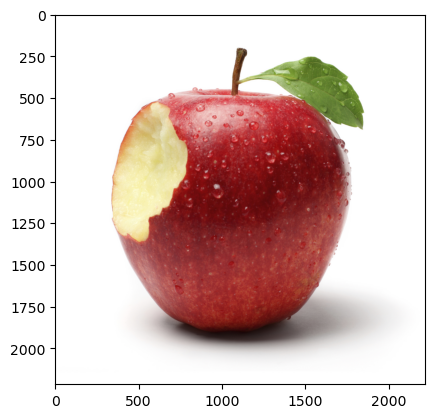

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
image_path = 'Fruits_Vegetables/train/apple/Image_1.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.show()

***Test Data***

In [4]:
Test_Datagen = ImageDataGenerator(rescale = 1./255)
Test_data = Test_Datagen.flow_from_directory(
    'Fruits_Vegetables/test',
    target_size = (224,224),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical'
)

Found 360 images belonging to 36 classes.


***Building CNN***

In [5]:
mobile_net_v2 = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), include_top=False)

In [6]:
cnn = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
cnn.trainable = False

In [7]:
inputs = cnn.input

x = tf.keras.layers.Dense(128, activation='relu')(cnn.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

cnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

***Compile the CNN***

In [8]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

***Train the CNN***

In [30]:
cnn_model.fit(
    Train_data,
    validation_data=Test_data,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
98/98 [==============================] - 202s 2s/step - loss: 0.1794 - accuracy: 0.9310 - val_loss: 0.2241 - val_accuracy: 0.9306
Epoch 2/5
98/98 [==============================] - 204s 2s/step - loss: 0.1578 - accuracy: 0.9419 - val_loss: 0.2091 - val_accuracy: 0.9417
Epoch 3/5
98/98 [==============================] - 269s 3s/step - loss: 0.1403 - accuracy: 0.9470 - val_loss: 0.1914 - val_accuracy: 0.9639
Epoch 4/5
98/98 [==============================] - 269s 3s/step - loss: 0.1286 - accuracy: 0.9518 - val_loss: 0.1992 - val_accuracy: 0.9472
Epoch 5/5
98/98 [==============================] - 276s 3s/step - loss: 0.1182 - accuracy: 0.9592 - val_loss: 0.1664 - val_accuracy: 0.9611


***Single Prediction***

In [36]:
Labels= ['cucumber' 'banana' 'grapes' 'orange' 'soy beans' 'sweetcorn'
 'watermelon' 'spinach' 'paprika' 'turnip' 'tomato' 'lettuce' 'raddish'
 'pomegranate' 'cauliflower' 'chilli pepper' 'pineapple' 'beetroot'
 'garlic' 'peas' 'bell pepper' 'carrot' 'onion' 'sweetpotato' 'kiwi'
 'jalepeno' 'cabbage' 'corn' 'ginger' 'lemon' 'mango' 'potato' 'apple'
 'pear' 'capsicum' 'eggplant']
img_path = 'Fruits_Vegetables/test/chilli pepper/Image_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = img_array.reshape((1,) + img_array.shape)
pred = cnn_model.predict(img_array)
predicted_class_index = argmax(pred, axis=1)[0]
predicted_class_label = labels[predicted_class_index]

1/1 [==============================] - 1s 511ms/step


In [37]:
print(f"The predicted class label is: {predicted_class_label}")

The predicted class label is: chilli pepper
